In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
measurement = pd.read_csv('body_measurement.csv')

In [2]:
measurement

,Date,Weight,Fat,Viceral Fat,Muscle,BodyAge,RM,BMI
0,2017-10-16,73.5,22.7,7,37.7,39,1674,25.4
1,2017-10-17,73.1,22.3,7,35.1,48,1601,25.3
2,2017-10-18,73.5,22.7,7,36.0,44,1634,25.4
3,2017-10-19,73.0,22.4,7,36.2,44,1627,25.3
4,2017-10-20,73.1,22.5,7,36.0,45,1623,25.3
5,2017-10-21,73.4,22.8,7,35.7,45,1626,25.5
6,2017-10-22,73.2,22.7,7,37.0,41,1655,25.5
7,2017-10-23,73.0,22.6,7,37.6,39,1663,25.4
8,2017-10-24,72.4,22.0,7,35.1,47,1588,25.2
9,2017-10-25,72.2,22.1,7,35.9,44,1606,25.1


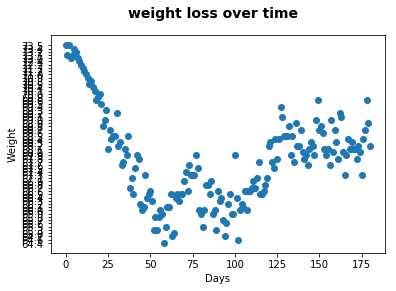

In [3]:
index = measurement.index
weight = measurement.iloc[:, 1:2]
plt.scatter(index, weight)
plt.suptitle('weight loss over time', fontsize=14, fontweight='bold')
plt.ylabel('Weight')
plt.xlabel('Days')
#plt.title('wight loss over time')
plt.show()

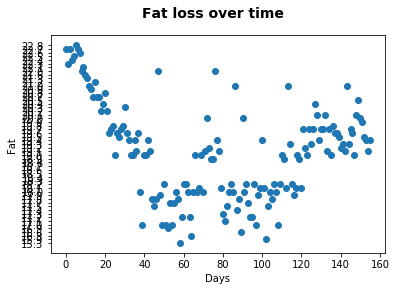

In [4]:
fat = measurement.iloc[:, 2:3]
plt.scatter(index, fat)
plt.suptitle('Fat loss over time', fontsize=14, fontweight='bold')
plt.ylabel('Fat')
plt.xlabel('Days')
plt.show()

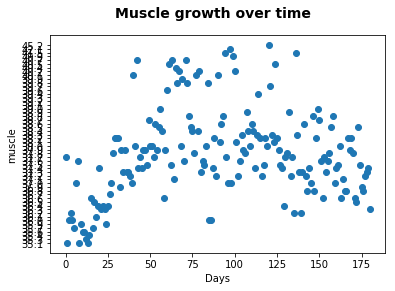

In [4]:
muscle = measurement.iloc[:, 4:5]
plt.scatter(index, muscle)
plt.suptitle('Muscle growth over time', fontsize=14, fontweight='bold')
plt.ylabel('muscle')
plt.xlabel('Days')
plt.show()